# Superstore Sales Analysis: Data Analysis Project

## 1. Project Overview
**Analyst:** Calvin Leo

**Dataset:** Sample - Superstore (Retail Data)

**Project Objective:**
This project aims to analyze sales data from a US-based retail store (Superstore). The main focus is to identify sales patterns, analyze profitability across different segments, and provide data-driven business recommendations.

**Business Questions:**
1. How is the sales trend performing over time?
2. Which product categories generate the highest and lowest profits?
3. Which regions are underperforming?
4. How do discounts affect overall profitability?

# ==========================================
# 1. IMPORT LIBRARIES
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration to display plots directly in the notebook
%matplotlib inline

# Optional: Set the aesthetic style of the plots
sns.set_style('whitegrid')

print("Setup Complete: Libraries loaded successfully.")

## 2. Data Loading
Importing the `Sample - Superstore.csv` dataset into a Pandas DataFrame.
*Note: This dataset often uses `windows-1252` encoding rather than standard `utf-8`.*

In [14]:
# ==========================================
# 2. LOAD DATASET
# ==========================================

# Filename matches the one you downloaded
filename = 'Sample - Superstore.csv'

try:
    # Attempt to read the file with specific encoding
    df = pd.read_csv(filename, encoding='windows-1252')
    print(f"Successfully loaded data: {filename}")
except FileNotFoundError:
    print(f"Error: File '{filename}' not found. Please ensure the file is in the same directory.")

# Display the first 5 rows
df.head()

Successfully loaded data: Sample - Superstore.csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 3. Data Understanding & Overview
This stage aims to understand the data structure, data types, and check for the existence of missing values.

In [17]:
# Check data dimensions (rows, columns)
print(f"Data Dimensions: {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Check data types and null values
df.info()

# Check descriptive statistics (for numerical columns)
df.describe()

Data Dimensions: 9994 rows and 21 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales   

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 4. Data Cleaning & Preprocessing
Steps taken to prepare the data for analysis:
1. **Date Conversion:** Convert `Order Date` and `Ship Date` columns from *object* (string) to *datetime* format.
2. **Duplicate Check:** Identify and remove duplicate rows if any exist.
3. **Missing Values:** Ensure there are no critical missing values.

In [20]:
# ==========================================
# 4. DATA CLEANING
# ==========================================

# 1. Convert Date columns to datetime objects
# Essential for time-series analysis (Month/Year)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# 2. Check and Remove Duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

# 3. Check for Missing Values
print("\nMissing Values per column:")
print(df.isnull().sum())

Duplicate rows found: 0

Missing Values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


## 5. Feature Engineering
Creating new derived columns to facilitate time-based analysis.
* `Order Year`: The year the order was placed.
* `Order Month`: The month the order was placed (YYYY-MM).

In [23]:
# ==========================================
# 5. FEATURE ENGINEERING
# ==========================================

# Extract Year
df['Order Year'] = df['Order Date'].dt.year

# Extract Month (Period format for proper sorting)
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Display the final dataframe ready for analysis
print("Data is ready for Exploratory Data Analysis (EDA).")
df[['Order Date', 'Order Year', 'Order Month', 'Sales', 'Profit']].head()

Data is ready for Exploratory Data Analysis (EDA).


,Order Date,Order Year,Order Month,Sales,Profit
0,2016-11-08,2016,2016-11,261.9600,41.9136
1,2016-11-08,2016,2016-11,731.9400,219.5820
2,2016-06-12,2016,2016-06,14.6200,6.8714
3,2015-10-11,2015,2015-10,957.5775,-383.0310
4,2015-10-11,2015,2015-10,22.3680,2.5164


# 6. Exploratory Data Analysis (EDA)

In this section, we will generate visualizations to answer the defined business questions.

## 6.1. Sales Trend Analysis (Time Series)
**Question:** How is the sales trend performing over time? Is there any seasonality?

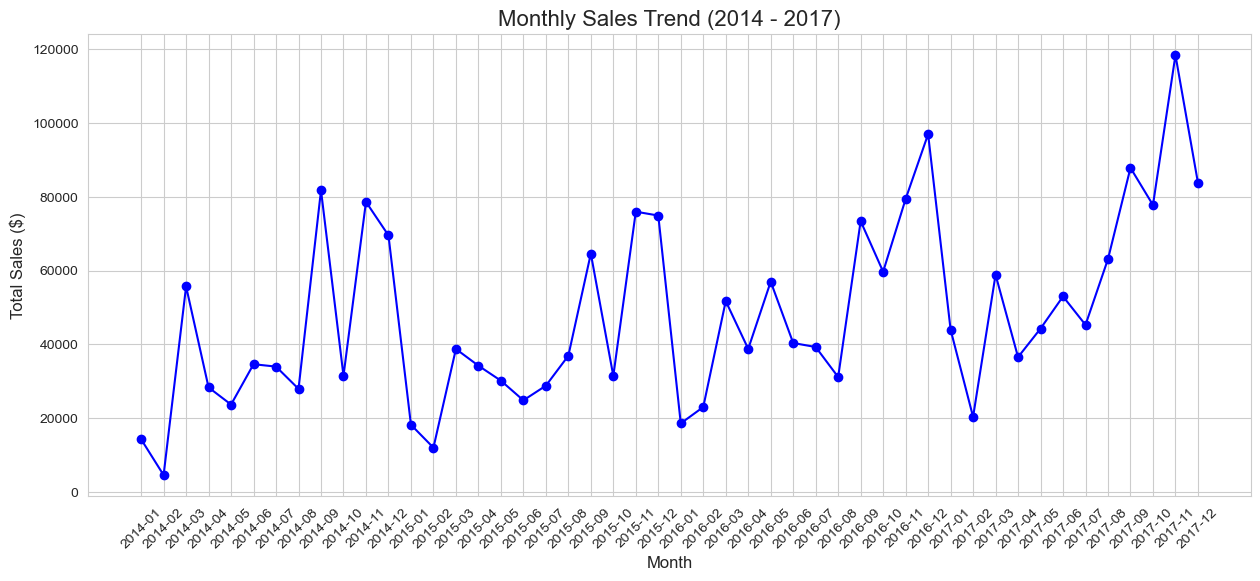

In [32]:
# ==========================================
# 6.1 SALES TREND ANALYSIS
# ==========================================

# Grouping data by Order Month and summing Sales
# We convert the Period index to String for better plotting compatibility
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.index = monthly_sales.index.astype(str)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend (2014 - 2017)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 6.2. Sales vs Profit by Category
**Question:** Which product categories generate the highest revenue and profit?
*Warning: High sales do not always mean high profit.*

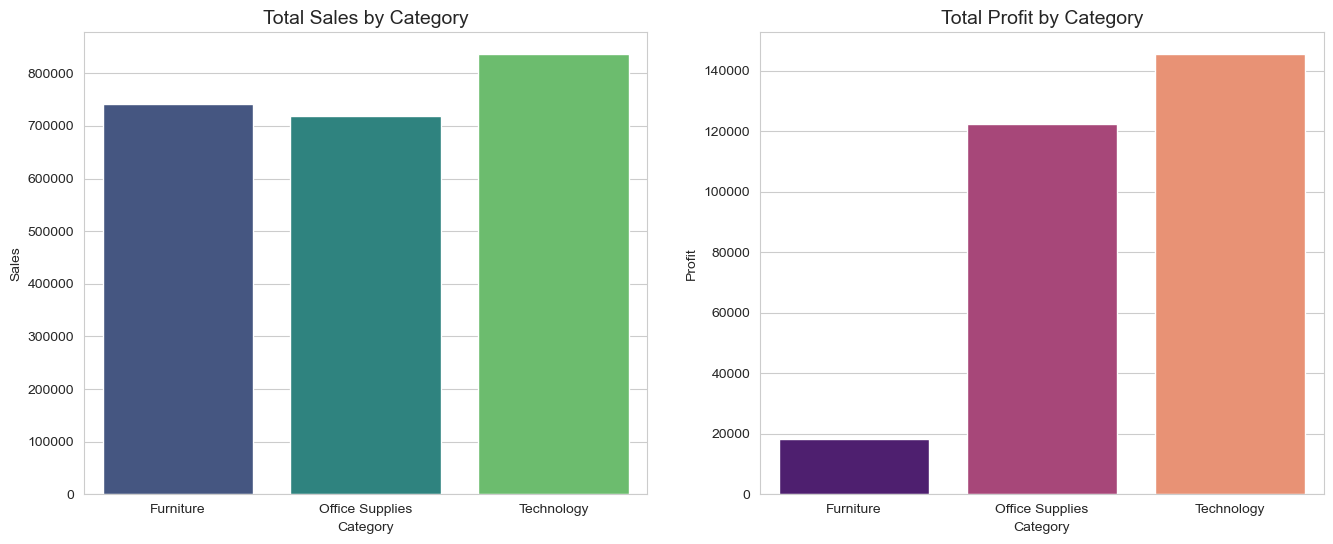

In [41]:
# ==========================================
# 6.2 CATEGORY ANALYSIS 
# ==========================================

# Aggregating Sales and Profit by Category
category_analysis = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Plotting using Seaborn
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Total Sales by Category
# Fix: Tambahkan parameter hue='Category' dan legend=False
sns.barplot(x='Category', y='Sales', data=category_analysis, ax=ax[0],
            hue='Category', palette='viridis', legend=False)
ax[0].set_title('Total Sales by Category', fontsize=14)

# Chart 2: Total Profit by Category
# Fix: Tambahkan parameter hue='Category' dan legend=False
sns.barplot(x='Category', y='Profit', data=category_analysis, ax=ax[1],
            hue='Category', palette='magma', legend=False)
ax[1].set_title('Total Profit by Category', fontsize=14)

plt.show()

## 6.3. Sub-Category Analysis (Deep Dive)
**Insight Extraction:** Let's drill down to see which specific sub-categories are performing well or causing losses.

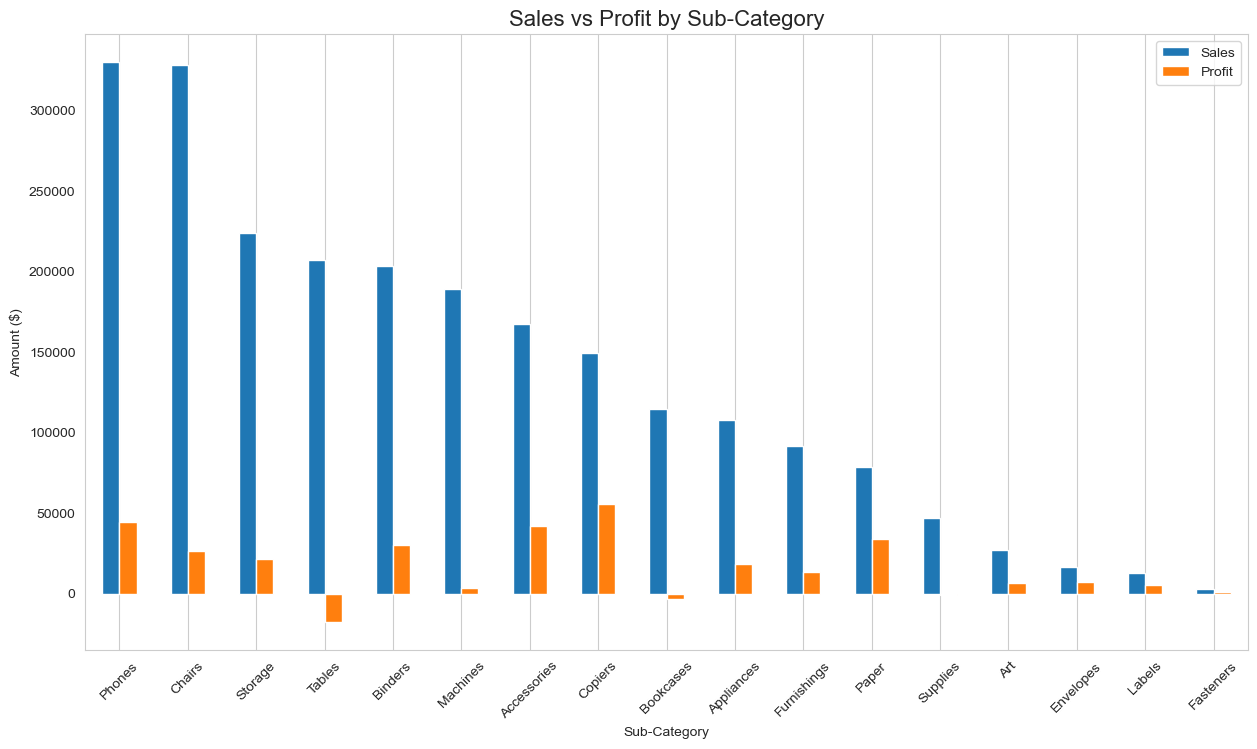

In [44]:
# ==========================================
# 6.3 SUB-CATEGORY ANALYSIS
# ==========================================

# Grouping by Sub-Category
subcat_analysis = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
subcat_analysis[['Sales', 'Profit']].plot(kind='bar', ax=ax)
plt.title('Sales vs Profit by Sub-Category', fontsize=16)
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 6.4. Geographical Analysis
**Question:** Which regions are the most profitable, and which states are performing poorly?

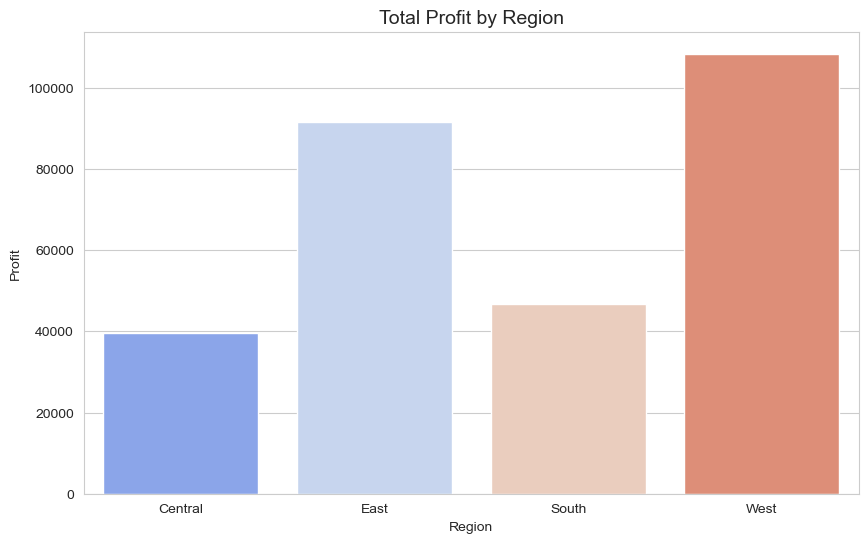


Top 5 States with Lowest Profit (Huge Losses):
State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Name: Profit, dtype: float64


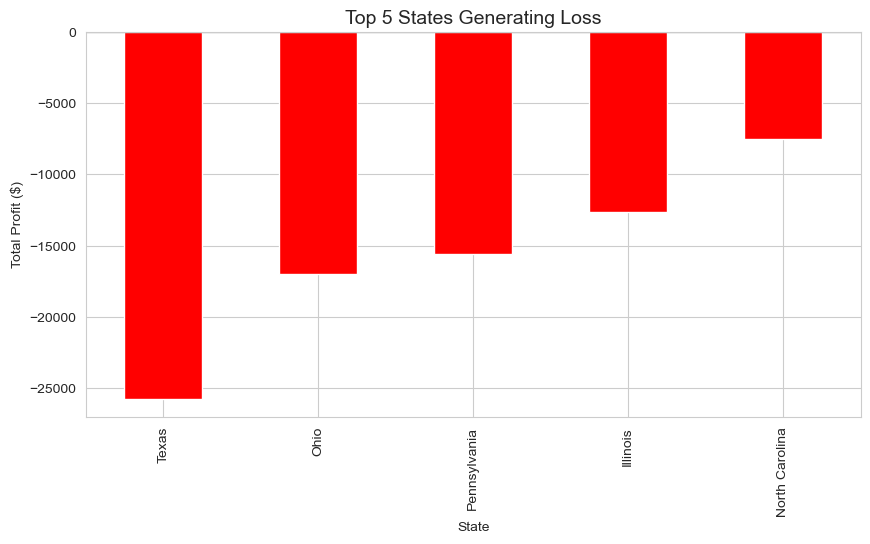

In [51]:
# ==========================================
# 6.4 GEOGRAPHICAL ANALYSIS
# ==========================================

# 1. Profit by Region
region_analysis = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Plotting Region Analysis
plt.figure(figsize=(10, 6))
# Fix: Menggunakan hue='Region' untuk menghindari warning Seaborn
sns.barplot(x='Region', y='Profit', data=region_analysis, hue='Region', palette='coolwarm', legend=False)
plt.title('Total Profit by Region', fontsize=14)
plt.show()

# 2. Deep Dive: Top 5 States with Lowest Profit (Loss Makers)
state_profit = df.groupby('State')['Profit'].sum().sort_values().head(5)

print("\nTop 5 States with Lowest Profit (Huge Losses):")
print(state_profit)

# Plotting the Loss Makers
plt.figure(figsize=(10, 5))
state_profit.plot(kind='bar', color='red')
plt.title('Top 5 States Generating Loss', fontsize=14)
plt.ylabel('Total Profit ($)')
plt.axhline(0, color='black', linewidth=0.8) # Garis nol sebagai batas
plt.show()

## 6.5. Discount Impact Analysis
**Question:** Does offering higher discounts lead to higher sales or just loss of profit?
**Hypothesis:** There is a threshold where discount becomes detrimental to the business.

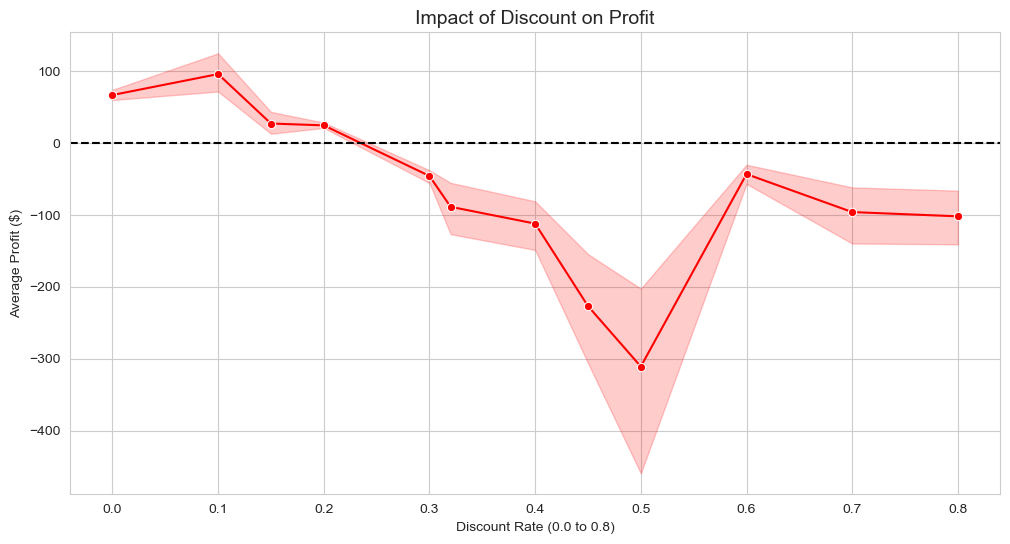

In [54]:
# ==========================================
# 6.5 DISCOUNT VS PROFIT
# ==========================================

plt.figure(figsize=(12, 6))

# Menggunakan Lineplot untuk melihat tren rata-rata profit pada setiap level diskon
sns.lineplot(x='Discount', y='Profit', data=df, marker='o', color='red')

plt.title('Impact of Discount on Profit', fontsize=14)
plt.xlabel('Discount Rate (0.0 to 0.8)')
plt.ylabel('Average Profit ($)')
plt.axhline(0, color='black', linestyle='--') # Garis batas impas (Break-even point)
plt.grid(True)
plt.show()

## 6.6. Correlation Heatmap
Overview of how numerical variables correlate with each other.

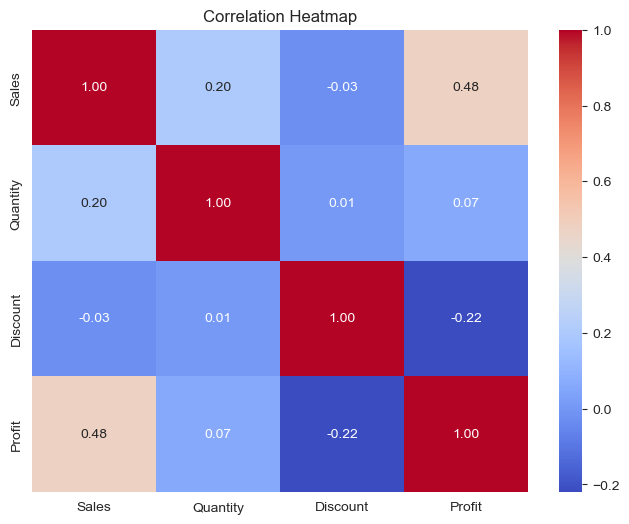

In [57]:
# ==========================================
# 6.6 CORRELATION MATRIX
# ==========================================

# Memilih hanya kolom numerik
numeric_df = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Hitung korelasi
corr_matrix = numeric_df.corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 7. Conclusion & Business Recommendations

Based on the analysis of the Superstore sales data, here are the key findings and actionable recommendations:

## 7.1. Key Findings (Insights)
1.  **Sales Seasonality:** Sales consistently peak in the fourth quarter (November & December), indicating a strong seasonal trend likely driven by holiday shopping.
2.  **Category Performance:**
    * **Technology** is the most profitable category.
    * **Furniture** generates high sales but very low profit. Specifically, the **"Tables"** sub-category is significantly unprofitable.
3.  **Geographical Issues:**
    * The **West** and **East** regions are performing well.
    * **Texas**, **Ohio**, and **Pennsylvania** are the top loss-making states, dragging down the overall profit of their respective regions.
4.  **Discount Strategy:** There is a strong negative correlation between discount and profit. Data shows that **discounts above 20%** consistently result in financial losses.

## 7.2. Business Recommendations
1.  **Optimize Discount Strategy:**
    * **Stop offering discounts > 20%**, especially on standalone orders, as they destroy profit margins.
    * Implement a strict approval process for any high-discount deals.
2.  **Revamp "Furniture" Category Strategy:**
    * The "Tables" sub-category needs immediate review. Consider increasing the base price, reducing production/shipping costs, or removing unprofitable items from the catalog.
3.  **Regional Intervention:**
    * Investigate logistics and operational costs in **Texas** and **Ohio**. High sales with negative profit suggest issues with shipping costs or excessive discounting in these specific areas.
4.  **Maximize Q4 Revenue:**
    * Since sales peak in Nov-Dec, prepare inventory and marketing campaigns 2 months in advance (Sept-Oct) to maximize the holiday season opportunity.

In [60]:
# ==========================================
# 8. SAVE CLEAN DATA
# ==========================================

# Saving the cleaned dataframe to a new CSV file for dashboarding (e.g., Tableau/PowerBI)
output_filename = 'Superstore_Cleaned_Data.csv'
df.to_csv(output_filename, index=False)

print(f"Data Cleaning & Analysis Complete.")
print(f"Clean file saved as: {output_filename}")

Data Cleaning & Analysis Complete.
Clean file saved as: Superstore_Cleaned_Data.csv
